<a href="https://colab.research.google.com/github/Harsh152003/Reinforcement_Learning/blob/main/Exp_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

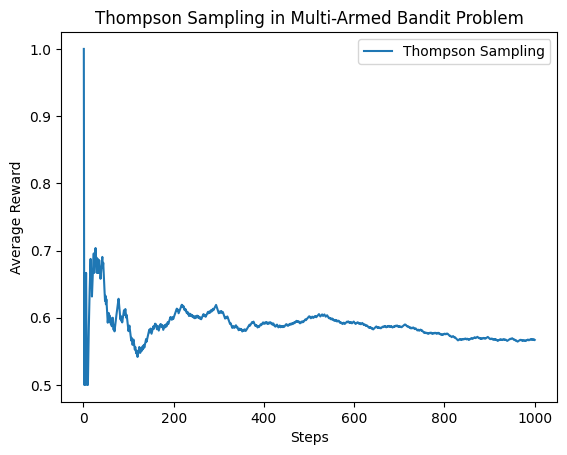

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Thompson Sampling algorithm
def thompson_sampling_bandit(arms, num_steps):
    num_arms = len(arms)
    successes = np.zeros(num_arms)
    failures = np.zeros(num_arms)

    total_reward_ts = 0
    rewards_ts = []

    for t in range(1, num_steps + 1):
        # Thompson Sampling action selection
        sampled_theta = np.random.beta(successes + 1, failures + 1)
        action = np.argmax(sampled_theta)

        # Simulate pulling the selected arm and receiving a reward
        reward = arms[action]()
        total_reward_ts += reward

        # Update successes and failures
        if reward == 1:
            successes[action] += 1
        else:
            failures[action] += 1

        rewards_ts.append(total_reward_ts / t)

    return rewards_ts

# Example usage
def main():
    num_arms = 5
    true_probs = np.random.uniform(0.2, 0.8, num_arms)

    arms = [lambda p=true_probs[i]: np.random.binomial(1, p) for i in range(num_arms)]
    num_steps = 1000

    ts_rewards = thompson_sampling_bandit(arms, num_steps)
    # Plot results
    plt.plot(range(1, num_steps + 1), ts_rewards, label='Thompson Sampling')
    plt.xlabel('Steps')
    plt.ylabel('Average Reward')
    plt.legend()
    plt.title('Thompson Sampling in Multi-Armed Bandit Problem')
    plt.show()

if __name__ == "__main__":
    main()
